In [1]:
# Import libraries
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

# set plot size
plt.rcParams["figure.figsize"] = (20, 13)
%matplotlib inline
%config InlineBackend.figure_format = "retina"

# Data Analyse

In [2]:
interactions = pd.read_csv("./data_final_project/KuaiRec 2.0/data/big_matrix.csv")

interactions.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


## Check missing/error values

In [3]:
print(f"=== Check for nan ===")
for column in interactions.columns:
    if not interactions[interactions[column].isna()].empty:
        print(f"Column: {column}")
        print(interactions[interactions[column].isna()])

=== Check for nan ===


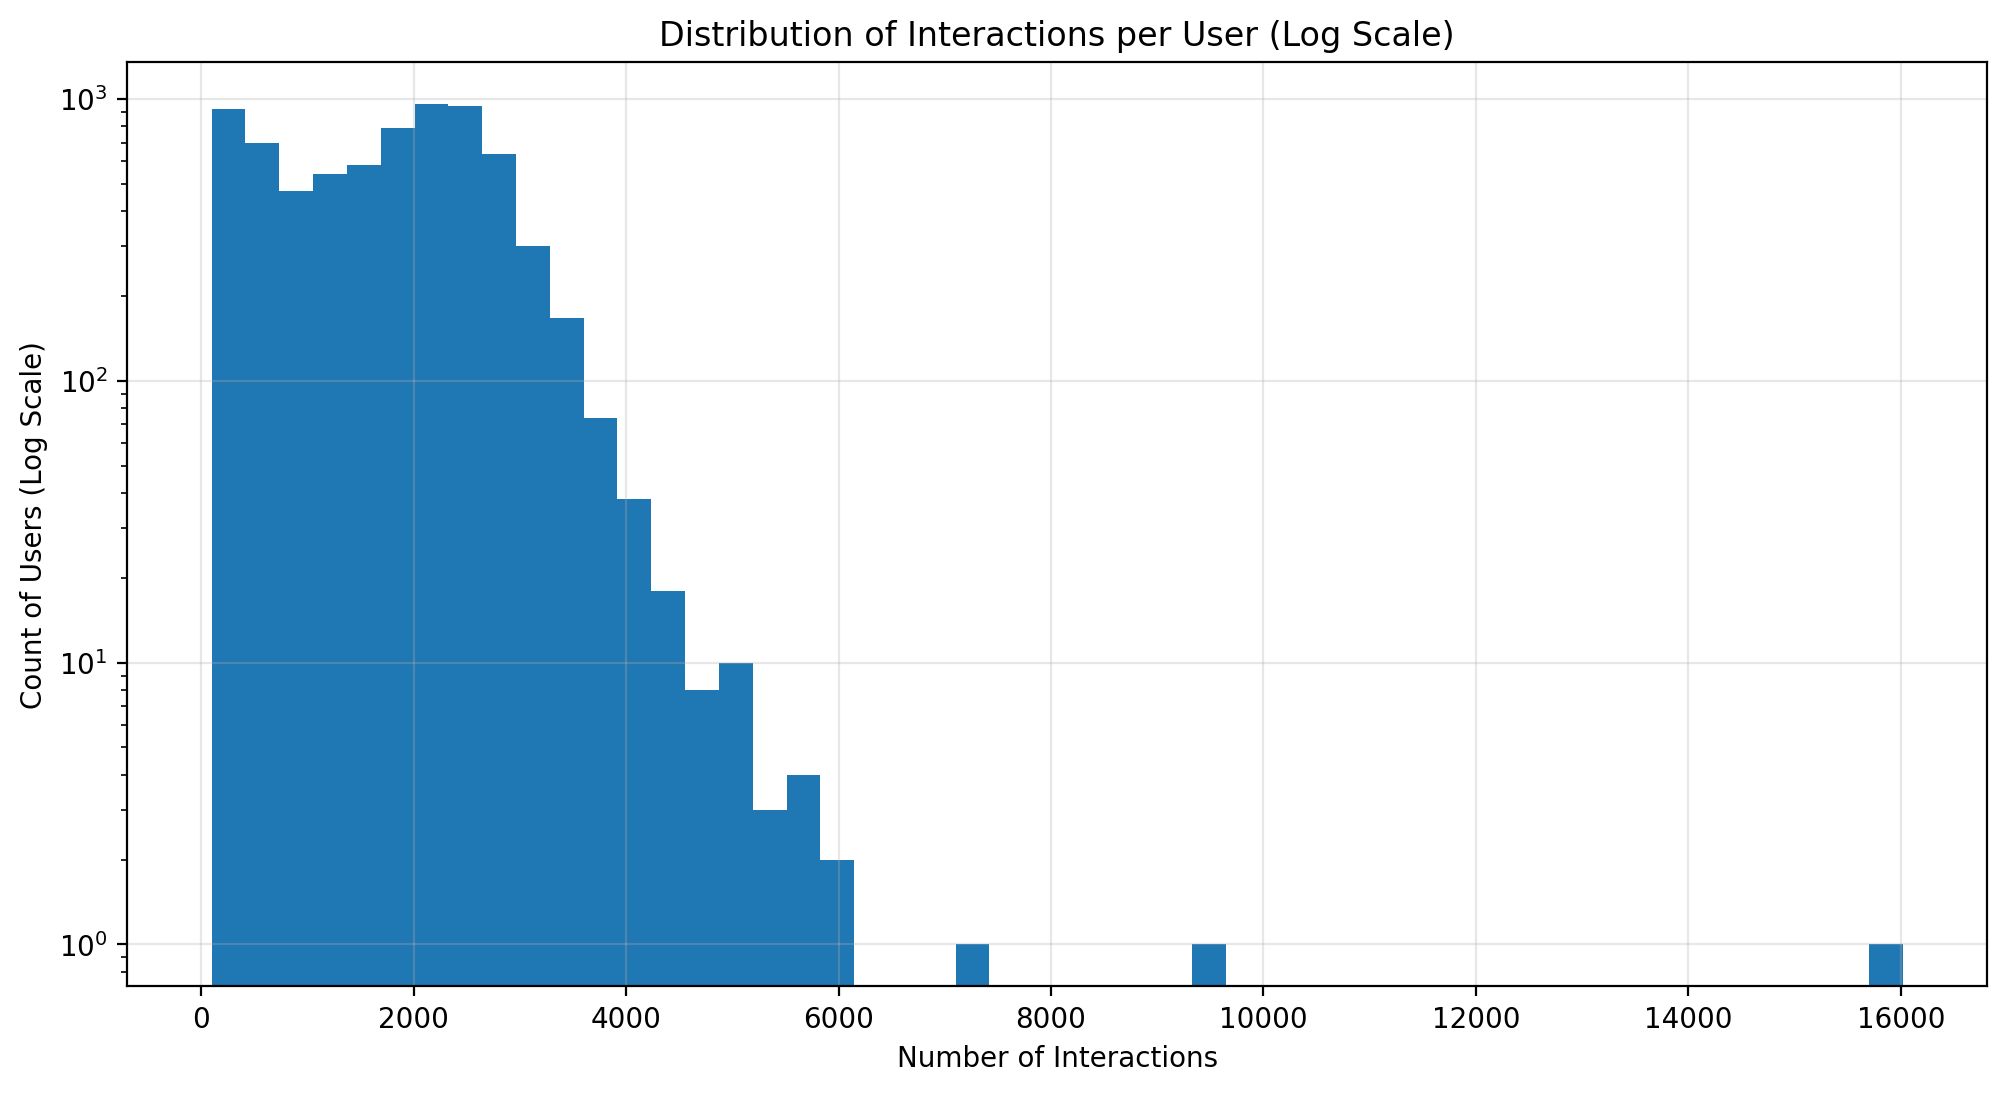

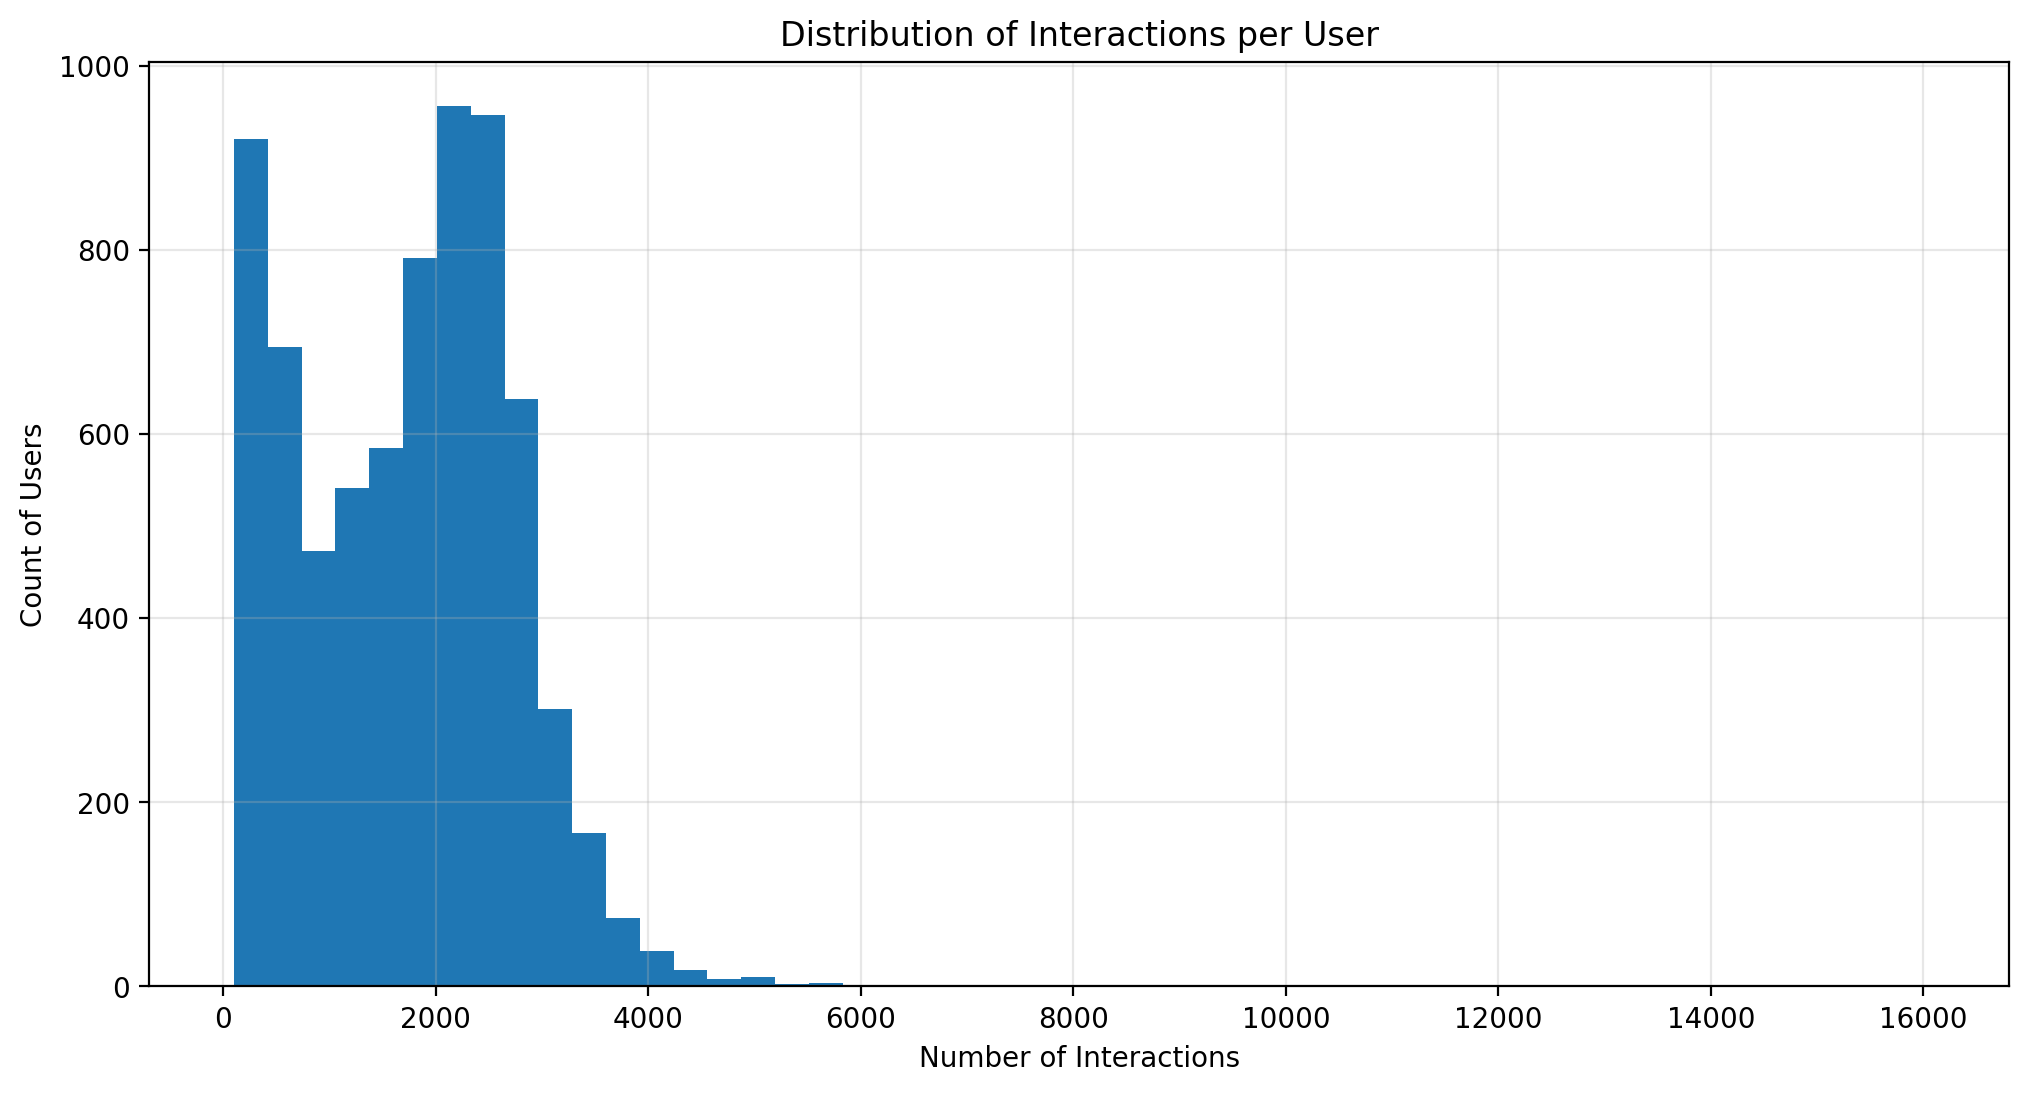

In [4]:
# Plot log histogram of interactions per user
# Get counts per user
user_counts = interactions["user_id"].value_counts()

# Create histogram with log scale
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50, log=True)
plt.title("Distribution of Interactions per User (Log Scale)")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users (Log Scale)")
plt.grid(True, alpha=0.3)
plt.show()

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(user_counts, bins=50)
plt.title("Distribution of Interactions per User")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Users")
plt.grid(True, alpha=0.3)
plt.show()

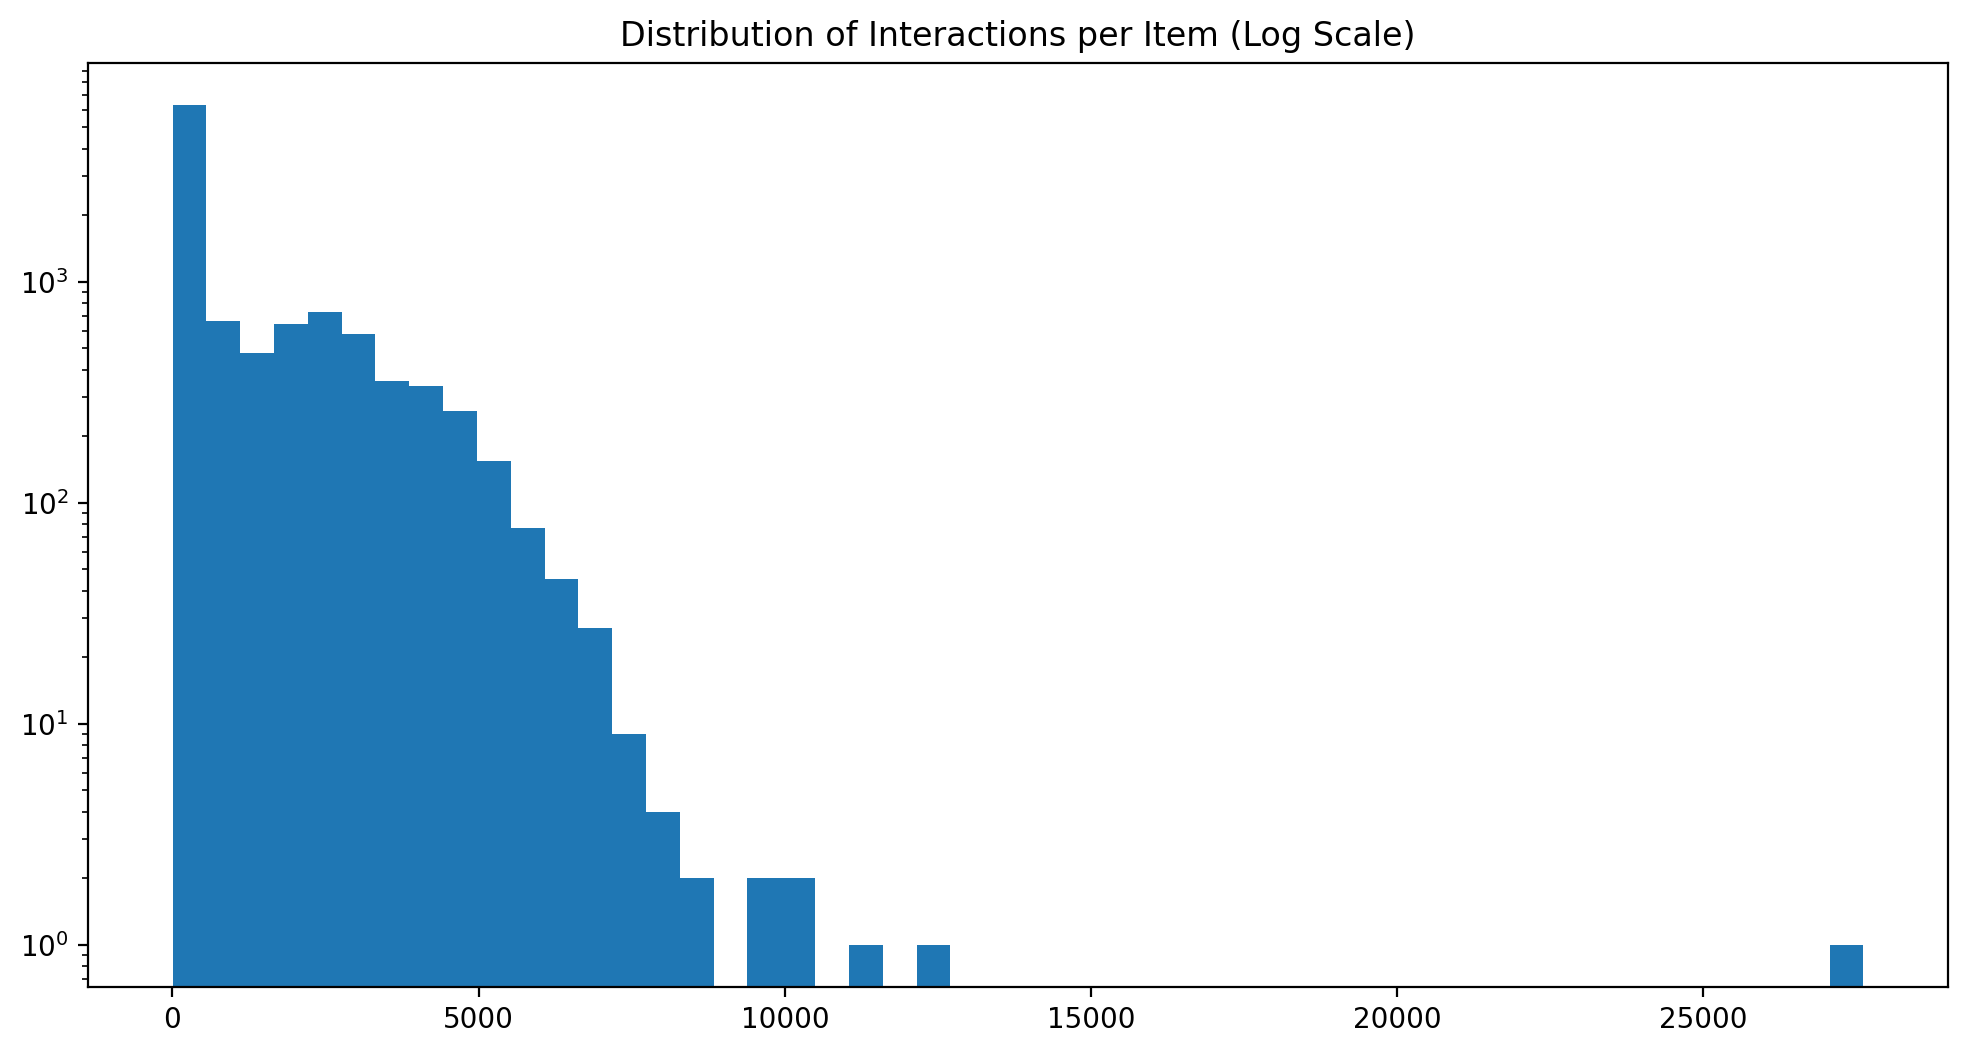

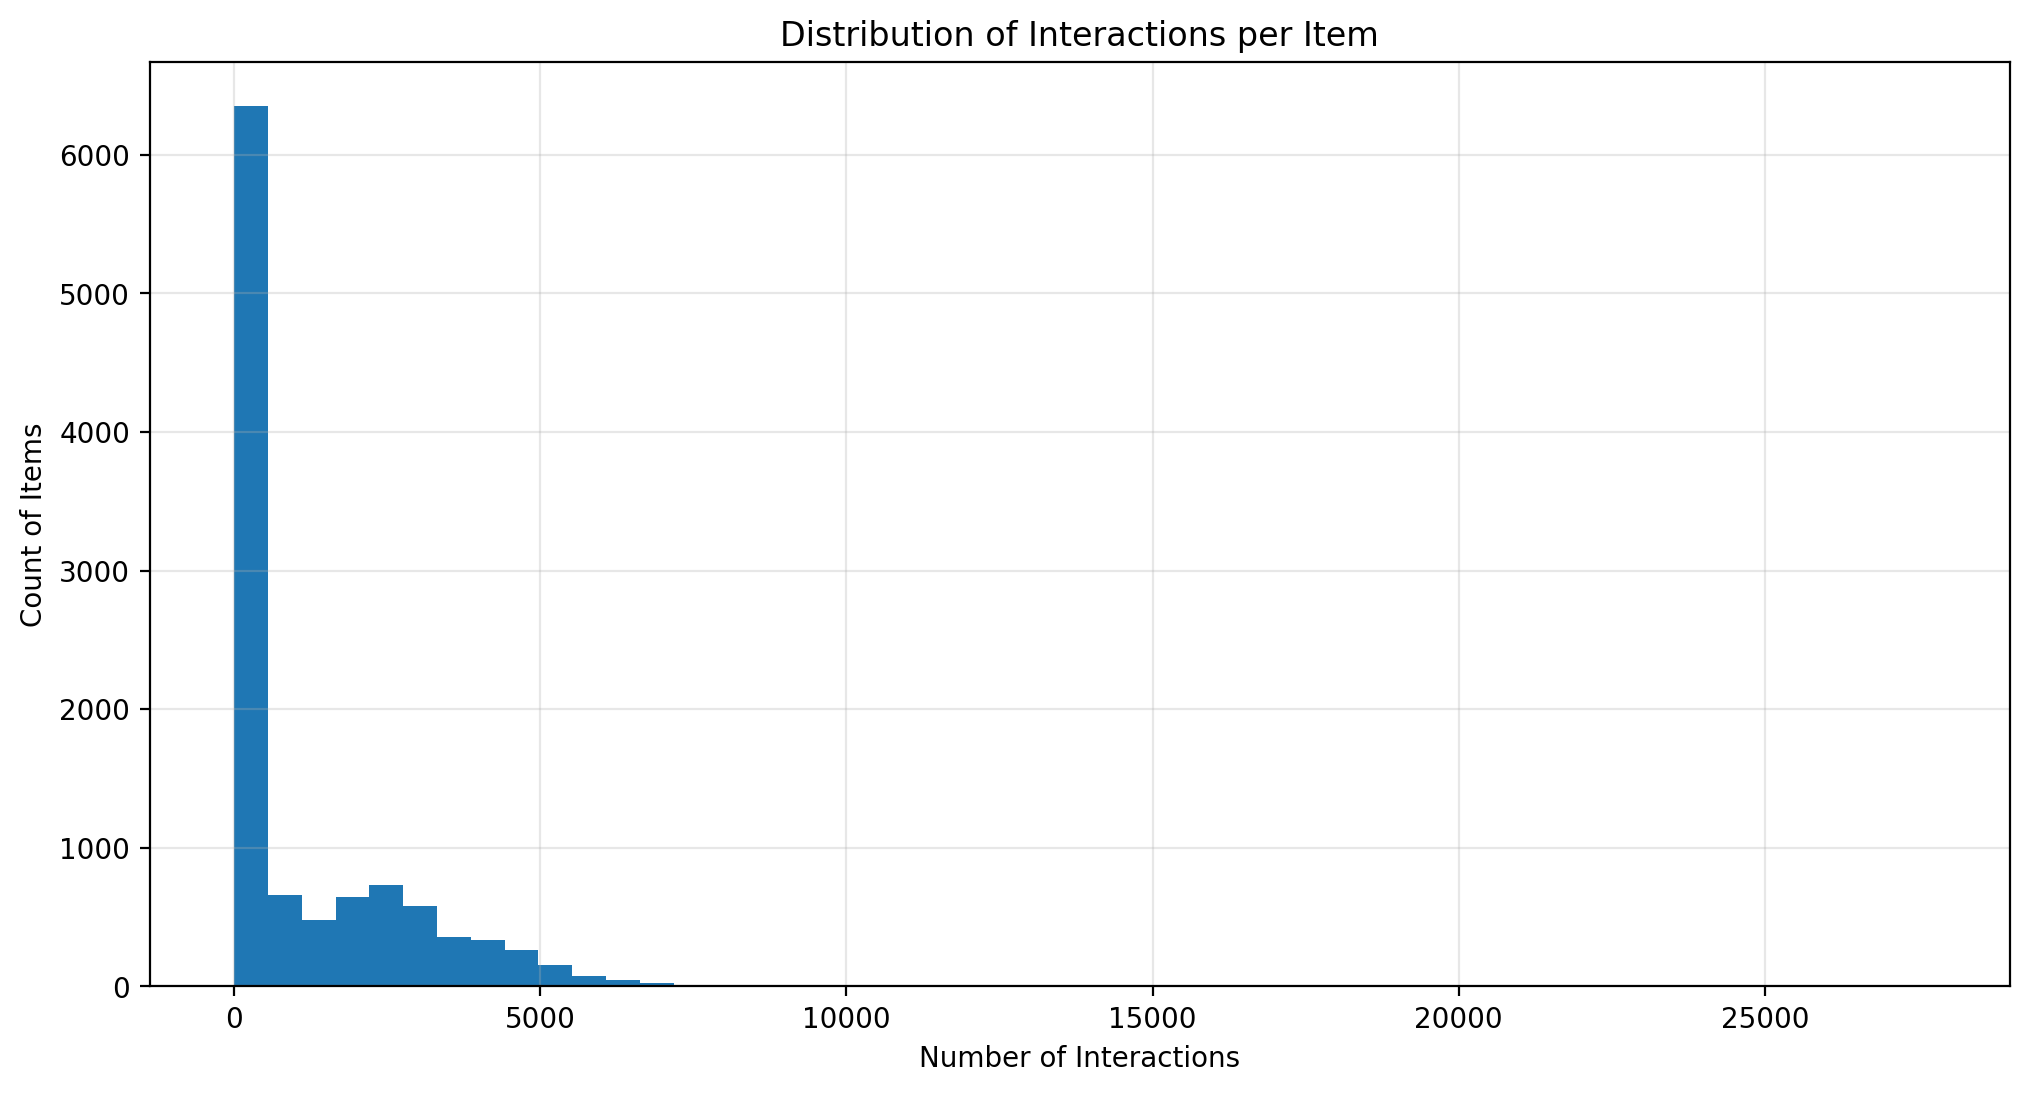

In [5]:
# Let's see the distribution of the interactions per item
item_counts = interactions["video_id"].value_counts()

# Plot log histogram of interactions per item
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50, log=True)
plt.title("Distribution of Interactions per Item (Log Scale)")

# Also plot regular scale for comparison
plt.figure(figsize=(12, 6))
plt.hist(item_counts, bins=50)
plt.title("Distribution of Interactions per Item")
plt.xlabel("Number of Interactions")
plt.ylabel("Count of Items")
plt.grid(True, alpha=0.3)
plt.show()

In [6]:
interactions.head()

,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
0,0,3649,13838,10867,2020-07-05 00:08:23.438,20200705,1.593879e+09,1.273397
1,0,9598,13665,10984,2020-07-05 00:13:41.297,20200705,1.593879e+09,1.244082
2,0,5262,851,7908,2020-07-05 00:16:06.687,20200705,1.593879e+09,0.107613
3,0,1963,862,9590,2020-07-05 00:20:26.792,20200705,1.593880e+09,0.089885
4,0,8234,858,11000,2020-07-05 00:43:05.128,20200705,1.593881e+09,0.078000


In [17]:
interactions[ (interactions['user_id'] == 3586) & (interactions['video_id'] == 7723)]


,user_id,video_id,play_duration,video_duration,time,date,timestamp,watch_ratio
6284550,3586,7723,9799,9705,2020-08-31 06:34:20.211,20200831,1.598827e+09,1.009686
6284551,3586,7723,9799,9705,2020-08-31 06:34:20.211,20200831,1.598827e+09,1.009686
6284552,3586,7723,24074,9705,2020-08-31 06:34:51.544,20200831,1.598827e+09,2.480577
6284553,3586,7723,24074,9705,2020-08-31 06:34:51.544,20200831,1.598827e+09,2.480577
6284554,3586,7723,24167,9705,2020-08-31 06:35:22.929,20200831,1.598827e+09,2.490160
...,...,...,...,...,...,...,...,...
6286769,3586,7723,24057,9705,2020-08-31 16:14:19.494,20200831,1.598862e+09,2.478825
6286770,3586,7723,24029,9705,2020-08-31 16:14:50.934,20200831,1.598862e+09,2.475940
6286771,3586,7723,24029,9705,2020-08-31 16:14:50.934,20200831,1.598862e+09,2.475940
6286772,3586,7723,21667,9705,2020-08-31 16:15:19.767,20200831,1.598862e+09,2.232561


In [8]:
test = interactions.groupby(['user_id','video_id']).agg({'video_id':'count'}).dropna().rename(columns={'video_id':'count'})


In [20]:
test.value_counts()

count
1        8459425
2        1614853
3         167692
4          35806
5           8594
          ...   
1148           1
1180           1
1725           1
1787           1
2224           1
Name: count, Length: 145, dtype: int64

<Axes: xlabel='count'>

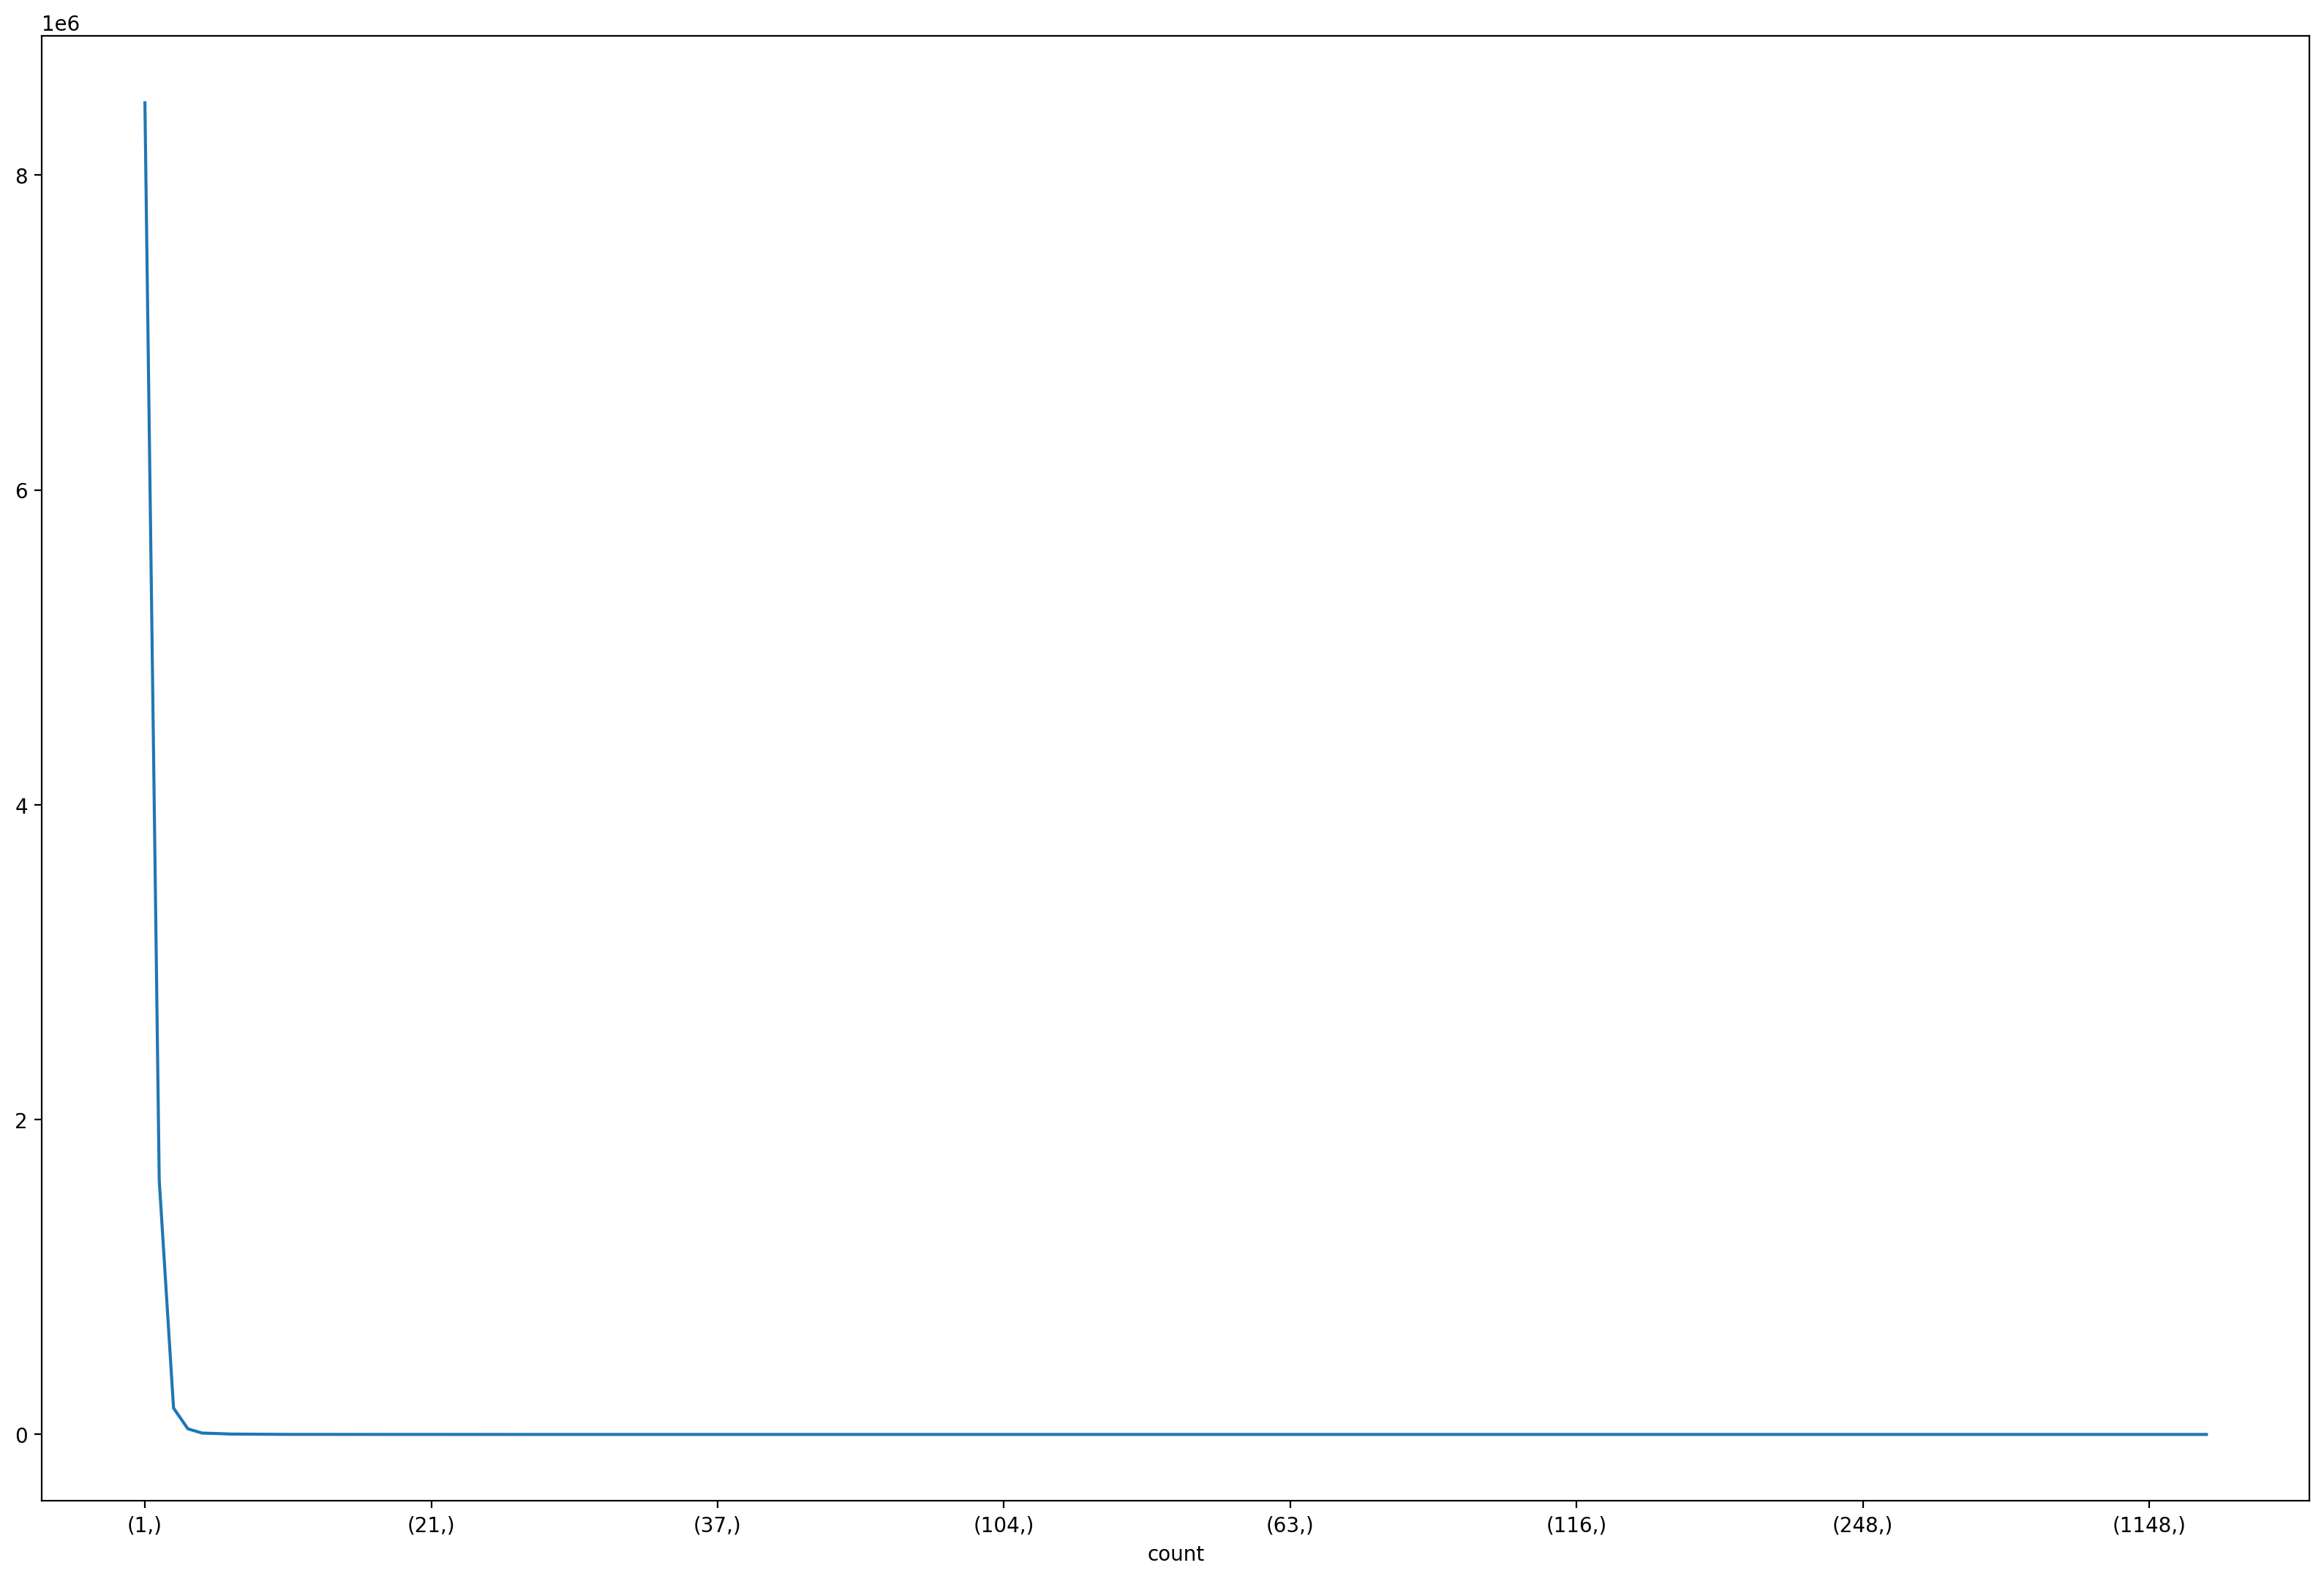

In [19]:
test.value_counts().plot()

In [13]:
np.unique(test['count'])

array([   1,    2,    3,    4,    5,    6,    7,    8,    9,   10,   11,
         12,   13,   14,   15,   16,   17,   18,   19,   20,   21,   22,
         23,   24,   25,   26,   27,   28,   29,   30,   31,   32,   33,
         34,   35,   36,   37,   38,   39,   40,   41,   42,   43,   44,
         45,   46,   47,   48,   49,   50,   52,   53,   54,   55,   56,
         58,   59,   60,   61,   62,   63,   64,   65,   66,   68,   69,
         70,   71,   72,   76,   77,   78,   80,   81,   82,   85,   86,
         89,   91,   92,   95,   96,   97,   99,  100,  102,  103,  104,
        106,  108,  110,  115,  116,  119,  124,  125,  128,  131,  132,
        134,  136,  137,  138,  140,  141,  142,  144,  153,  163,  166,
        168,  196,  198,  200,  208,  211,  217,  222,  228,  230,  248,
        251,  267,  272,  274,  313,  326,  329,  336,  348,  367,  386,
        415,  436,  481,  503,  567,  648,  767,  962, 1148, 1180, 1725,
       1787, 2224])

In [ ]:
test[test['video_id'] > 1]

video_id
user_id video_id          
0       169              2
        206              2
        217              2
        229              2
        237              2
...                    ...
7175    10360            2
        10377            2
        10408            2
        10552            2
        10572            2

[1841544 rows x 1 columns]

<Axes: xlabel='user_id,video_id'>

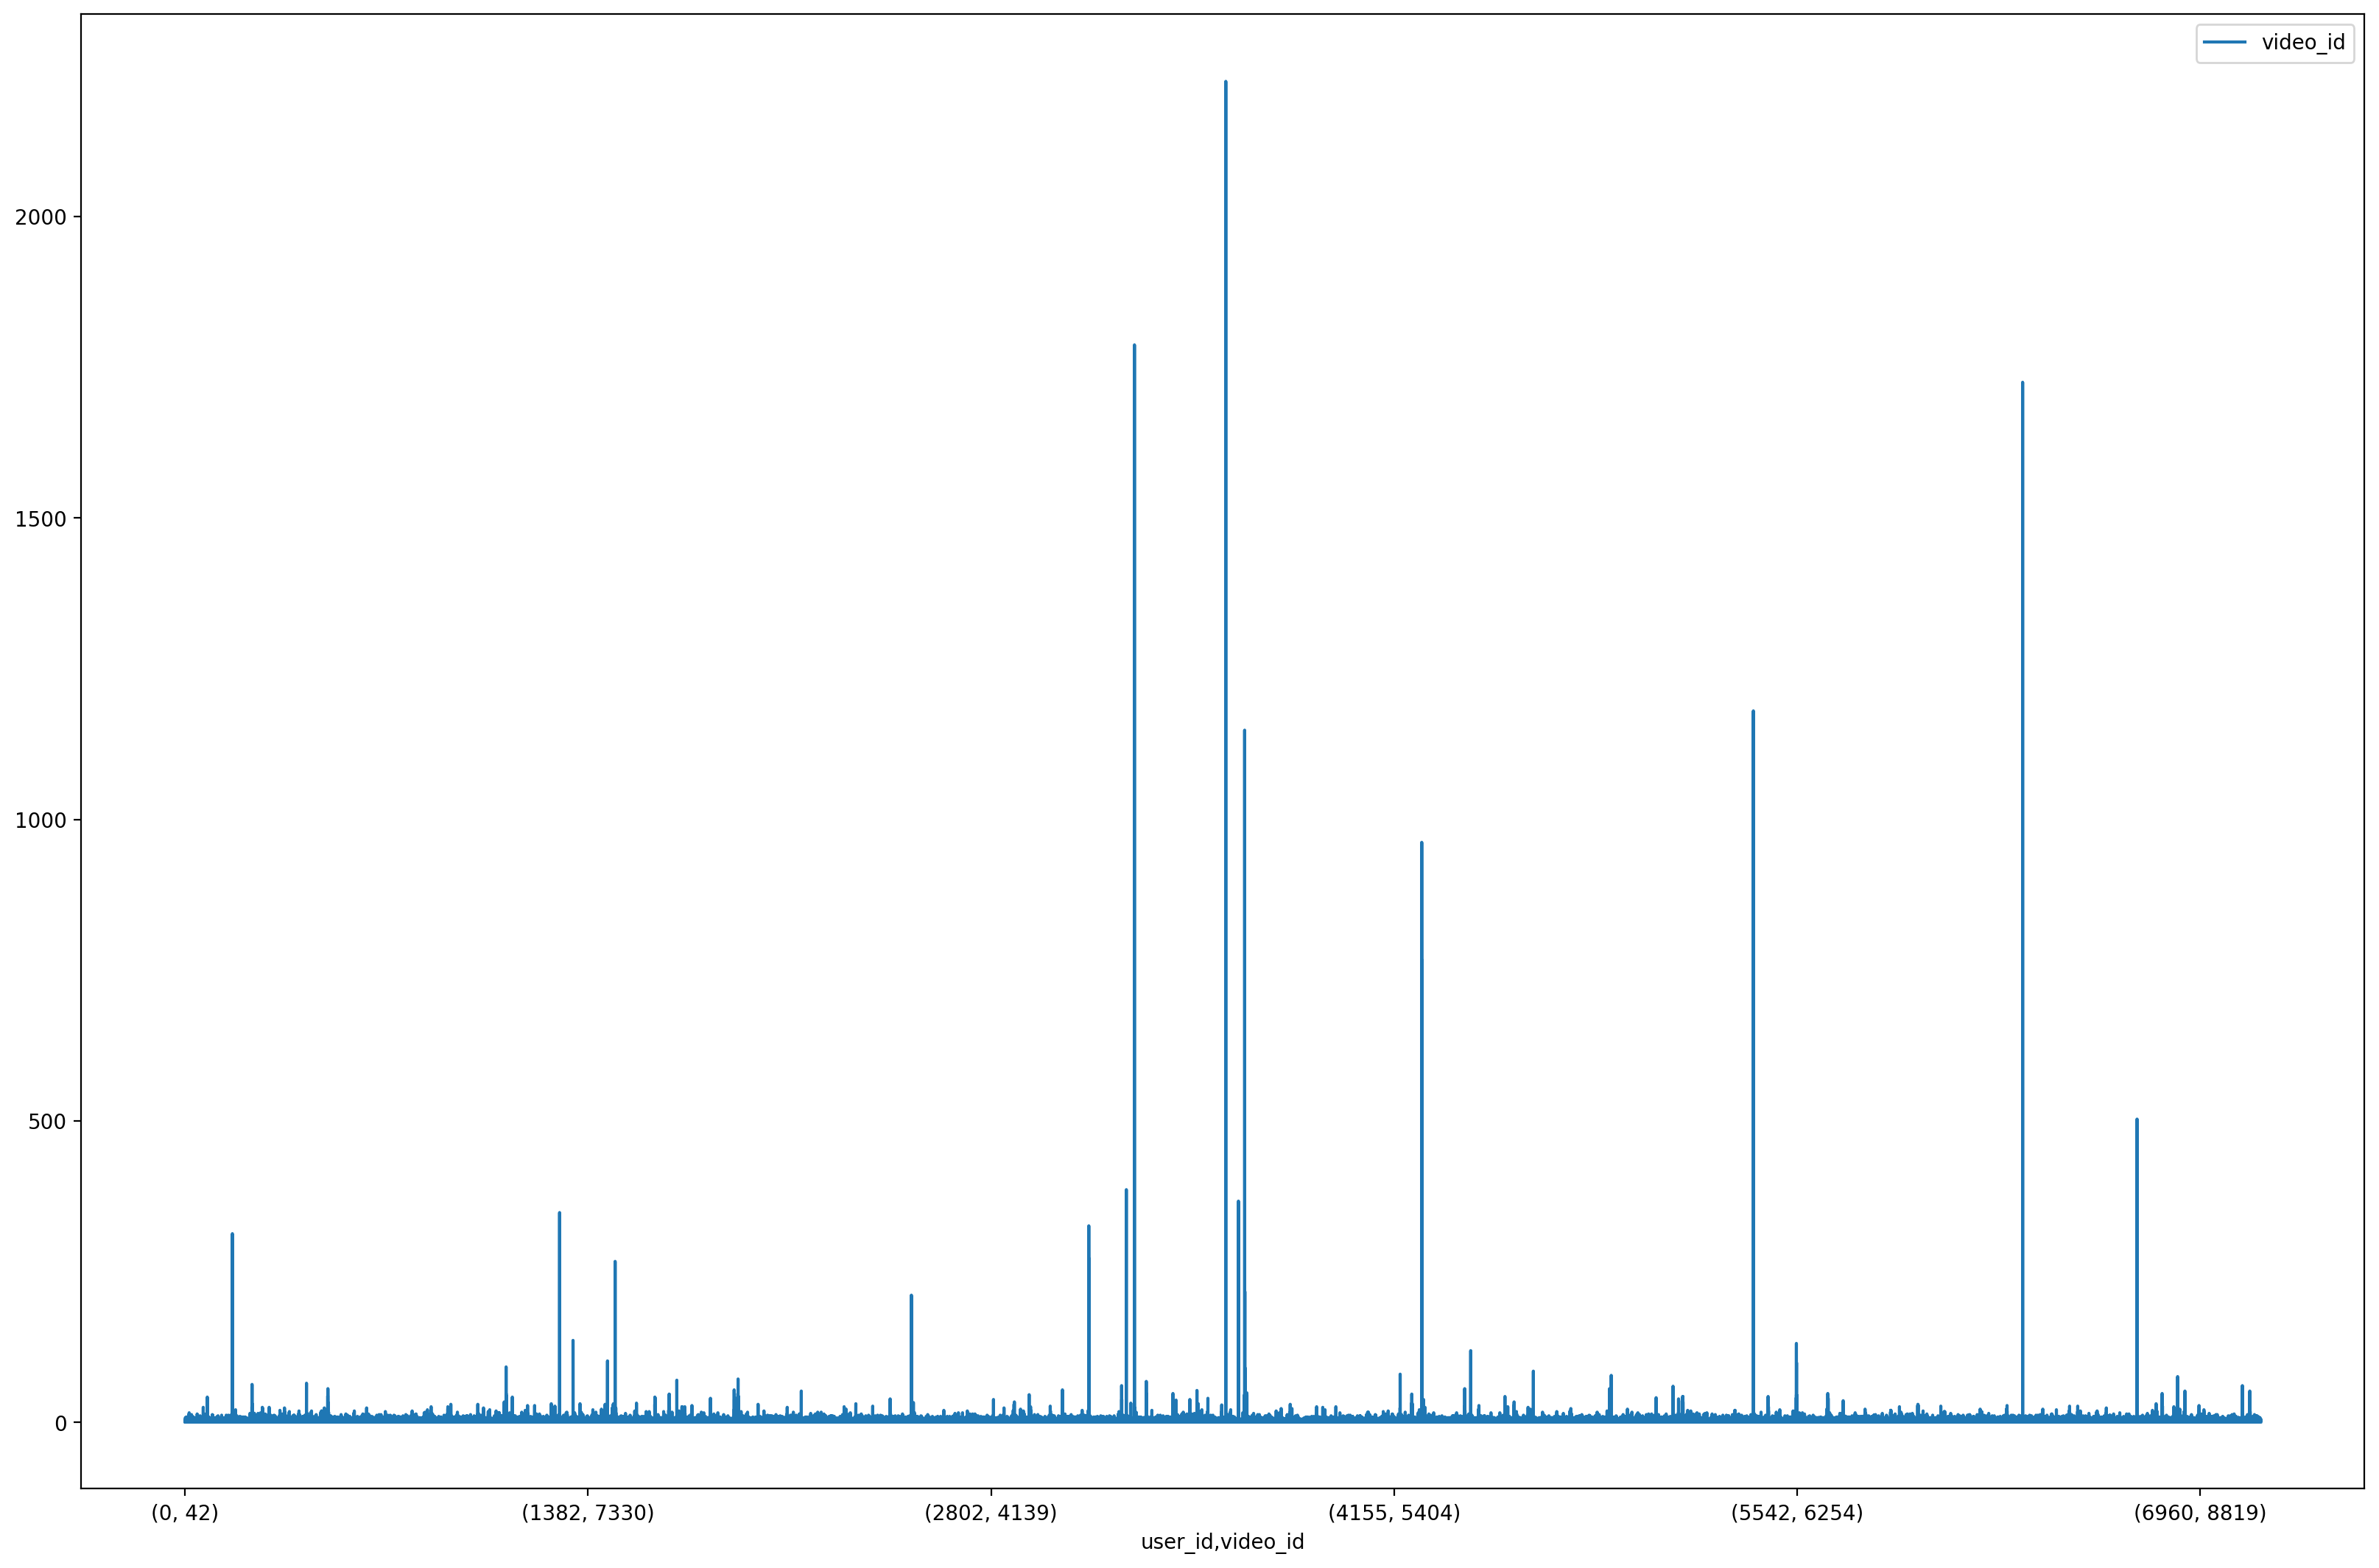

In [20]:
test.plot()

In [3]:


interactions['rating'] = np.where(interactions['watch_ratio'] > 0.8,1,0)

In [4]:
interactions['rating']

0           1
1           1
2           0
3           0
4           0
           ..
12530801    0
12530802    0
12530803    0
12530804    1
12530805    1
Name: rating, Length: 12530806, dtype: int64

In [6]:
interactions.drop_duplicates(subset=['user_id','video_id'], keep='last', inplace=True)

In [7]:
rating_matrix = interactions.pivot(index="user_id",columns="video_id",values="rating")
rating_matrix

video_id,0,1,2,3,4,5,6,7,8,9,...,10718,10719,10720,10721,10722,10723,10724,10725,10726,10727
user_id,,,,,,,,,,,,,,,,,,,,,
0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,0.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7171,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7172,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7173,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
